# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

Описание данных:

    airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
    balcony — число балконов
    ceiling_height — высота потолков (м)
    cityCenters_nearest — расстояние до центра города (м)
    days_exposition — сколько дней было размещено объявление (от публикации до снятия)
    first_day_exposition — дата публикации
    floor — этаж
    floors_total — всего этажей в доме
    is_apartment — апартаменты (булев тип)
    kitchen_area — площадь кухни в квадратных метрах (м²)
    last_price — цена на момент снятия с публикации
    living_area — жилая площадь в квадратных метрах(м²)
    locality_name — название населённого пункта
    open_plan — свободная планировка (булев тип)
    parks_around3000 — число парков в радиусе 3 км
    parks_nearest — расстояние до ближайшего парка (м)
    ponds_around3000 — число водоёмов в радиусе 3 км
    ponds_nearest — расстояние до ближайшего водоёма (м)
    rooms — число комнат
    studio — квартира-студия (булев тип)
    total_area — площадь квартиры в квадратных метрах (м²)
    total_images — число фотографий квартиры в объявлении
    
    План выполнения проекта:
    Шаг 1. Откроем файл с данными и изучим общую информацию
    
    Шаг 2. Предобработка данных
        определим и изучим пропущенные значения
        приведем данные к нужным типам
    
    Шаг 3. Посчитаем и добавим в таблицу:
        цену квадратного метра;
        день недели, месяц и год публикации объявления;
        этаж квартиры; варианты — первый, последний, другой;
        соотношение жилой и общей площади, а также отношение площади кухни к общей.
    
    Шаг 4. Проведием исследовательский анализ данных и выполним инструкции:
        Изучим параметры: площадь, цена, число комнат, высота потолков. Построим гистограммы для каждого параметра.
        Изучим время продажи квартиры. Построим гистограмму. Посчитаем среднее и медиану. Определим сколько обычно занимает продажа. ПРоанализируем какую продажу можно считать быстрой, а какую долгой?
        Уберием редкие и выбивающиеся значения.
        Выясним какие факторы больше всего влияют на стоимость квартиры? Изучим, зависит ли цена от квадратного метра, числа комнат, удалённости от центра. Изучим зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучим зависимость от даты размещения: дня недели, месяца и года.
        Выберем 10 населённых пунктов с наибольшим числом объявлений. Посчитаем среднюю цену квадратного метра в этих населённых пунктах. Выделим населённые пункты с самой высокой и низкой стоимостью жилья.
        Изучим предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделим квартиры в Санкт-Петербурге ('locality_name'). Выясним, какая область входит в центр. Создадим столбец с расстоянием до центра в километрах: округлим до целых значений. После этого посчитаем среднюю цену для каждого километра. Построим график, который показывает, как цена зависит от удалённости от центра. Определим границу, где график сильно меняется — это и будет центральная зона.
        Выделим сегмент квартир в центре. Проанализируем эту территорию и изучим следующие параметры: площадь, цена, число комнат, высота потолков. Выделим факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления).
    
    Шаг 5. Общий вывод

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [150]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [151]:
realty = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [152]:
realty.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [153]:
realty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

заметим, что параметры balcony, floors_total, days_exposition - должны быть целочисленными

In [154]:
realty.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


заметим: 
что присутствуют как и 12 кв.м. так и 900 кв.м. квартиры;
есть кухни с площадью 1.3 кв.м. так и 112 кв.м;
есть 100-метровые потолки; 19-комнатные квартиры; 60-этажне дома;

In [155]:
#посмотрим дубликаты
realty.duplicated().sum()

0

In [156]:
#посмотрим пропуски
realty.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

большое кол-во пропусков в стобцах: is_apartment, parks_nearest, ponds_nearest, balcony, ceiling_height

### Вывод

-параметры balcony, floors_total, days_exposition - должны быть целочисленными;

-для столбца is_apartment отсутствуют значения, и скорее всего они просто не указаны самими пользователями;

-для столбца balcony у 48,6% записей отсутствуют значения, человек не указал число балконов — скорее всего, балконов нет. Такие пропуски правильно заменить на 0;

-для столбца ceiling_height у 38,8% записей отсутствуют значения, скорее всего, их не заполнили по незнаю или посчитали неважным параметром для продажи пользователи;

-для столбцов living_area и kitchen_area у 8% и 9,6% записей соответственно отсутствуют значения, заполним такие пропуски медианой по населенному пункту;

-есть пропуски для параметра locality_name - сообщим об этой проблеме разработчикам, т.к. для недвижимости этот параметр ключевой и обязательный;

-для столбцов, которые получены автоматически на основе картографических данных, отсутствуют большое кол-во значений, поэтому необходимо сообщить об этой проблеме разработчикам;

-для столбца days_exposition есть пропуски в данных - сообщим об этой проблеме разработчикам;

### Шаг 2. Предобработка данных

In [157]:
#пропуски для параметра balcony заполним "0", т.к. скорее всего балконов нет, поэтому их и не указали
realty['balcony'] = realty['balcony'].fillna(0)

In [158]:
#пропуски для параметра floors_total заполним "1", т.к. скорее всего их не указали для одноэтажных домов
#realty['floors_total'] = realty['floors_total'].fillna(1)

In [159]:
#посмотрим на каких этажах находятся квартиры, для которых не заполнена этажность
realty.query('floors_total.isnull()')[['floors_total', 'floor']]['floor'].value_counts()

4     10
6      9
8      8
12     6
9      5
3      4
21     4
5      4
7      4
11     3
10     3
1      3
13     3
15     3
18     3
19     3
14     2
20     2
2      2
24     2
23     1
17     1
22     1
Name: floor, dtype: int64

In [160]:
#скорее всего, пользователи при заполнении объявления не заполняли параметр floors_total, т.к. поля Этаж и Этажность при создании объявления находились рядом, а их квартира находилась на последнем этаже, который они указывали в параметре floor. Исходя из этого предположения заполним пропуски значениями параметра floor.
realty['floors_total'] = realty['floors_total'].fillna(realty['floor'])

In [161]:
realty.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total                0
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [162]:
#пропуски для параметра ceiling_height заполним медианой по каждому населённому пункту
realty['locality_name'].fillna('unknown', inplace=True)

#name_to_height = realty.groupby('locality_name')['ceiling_height'].median().to_dict()
#realty['ceiling_height'].fillna(-1, inplace=True)

#def mapper_ceiling_height(row):
#    if row['ceiling_height'] == -1:
#        return name_to_height[row['locality_name']]
#    return row['ceiling_height']
#realty['ceiling_height'] = realty.apply(mapper_ceiling_height, axis=1)

In [163]:
#пропуски для параметра ceiling_height заполним медианой по зданиям с таким же кол-вом этажей, т.к. строительство, в основном, типовое, и одинаковые дома будут обладать схожими характеристиками
name_to_height = realty.groupby('floors_total')['ceiling_height'].median().to_dict()
realty['ceiling_height'].fillna(-1, inplace=True)

def mapper_ceiling_height(row):
    if row['ceiling_height'] == -1:
        return name_to_height[row['floors_total']]
    return row['ceiling_height']
realty['ceiling_height'] = realty.apply(mapper_ceiling_height, axis=1)

In [164]:
#оставшиеся значения NaN для ceiling_height заполним медианой по всему датасету
realty['ceiling_height'] = realty['ceiling_height'].fillna(realty['ceiling_height'].median())

In [165]:
realty.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name               0
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [166]:
#пропуски для параметра living_area заполним медианой по каждому населённому пункту
#name_to_living_area = realty.groupby('locality_name')['living_area'].median().to_dict()
realty['living_area'].fillna(-1, inplace=True)

#def mapper_living_area(row):
#    if row['living_area'] == -1:
#        return name_to_living_area[row['locality_name']]
#    return row['living_area']
#realty['living_area'] = realty.apply(mapper_living_area, axis=1)
#оставшиеся значения Nan для параметра living_area, где в locality_name все жилые площади были NaN, заполним медианой по всему датасету
#realty.loc[realty['living_area'].isnull(), 'living_area'] = realty['living_area'].median()

In [167]:
#создадим таблицу с коэффициентами зависимости living_area от total_area по количеству комнат
living_area_data = realty.query('living_area>0').pivot_table(index='rooms', values=['total_area', 'living_area'], aggfunc='mean')
living_area_data['coef'] = living_area_data['living_area'] / living_area_data['total_area']

In [168]:
#функция для рассчета living_area по коэфициенту зависимости площадей с учетом кол-ва комант
def living_area_ins(row, living_area_data):
    if row['living_area'] == -1:
        room = row['rooms']
        coef = living_area_data.query('rooms == @room')['coef'].iloc[0]
        return coef*row['total_area']
    return row['living_area']
 
realty['living_area'] = realty.apply(living_area_ins, axis=1, args=(living_area_data,))

In [169]:
realty.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name               0
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [170]:
#пропуски для параметра kitchen_area заполним медианой по каждому населённому пункту
#name_to_kitchen_area = realty.groupby('locality_name')['kitchen_area'].median().to_dict()
realty['kitchen_area'].fillna(-1, inplace=True)

#def mapper_kitchen_area(row):
#    if row['kitchen_area'] == -1:
#        return name_to_kitchen_area[row['locality_name']]
#    return row['kitchen_area']
#realty['kitchen_area'] = realty.apply(mapper_kitchen_area, axis=1)
#оставшиеся значения Nan для параметра kitchen_area, где в locality_name все площади кухни были NaN, заполним медианой по всему датасету
#realty.loc[realty['kitchen_area'].isnull(), 'kitchen_area'] = realty['kitchen_area'].median()

In [171]:
#создадим таблицу с коэффициентами зависимости kitchen_area от total_area по количеству комнат
kitchen_area_data = realty.query('kitchen_area>0').pivot_table(index='rooms', values=['total_area', 'kitchen_area'], aggfunc='mean')
kitchen_area_data['coef'] = kitchen_area_data['kitchen_area'] / kitchen_area_data['total_area']

In [172]:
#функция для рассчета kitchen_area по коэфициенту зависимости площадей с учетом кол-ва комнат
def kitchen_area_ins(row, kitchen_area_data):
    if (row['kitchen_area'] == -1) and (row['rooms']>0):
        room = row['rooms']
        coef = kitchen_area_data.query('rooms == @room')['coef'].iloc[0]
        return coef*row['total_area']
    return row['kitchen_area']



In [173]:
realty['kitchen_area'] = realty.apply(kitchen_area_ins, axis=1, args=(kitchen_area_data,))

In [174]:
realty.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [175]:
#пропуски для параметра days_exposition заполним медианой по каждому населённому пункту
#name_to_days_exposition = realty.groupby('locality_name')['days_exposition'].median().to_dict()
#realty['days_exposition'].fillna(-1, inplace=True)

#def mapper_days_exposition(row):
#    if row['days_exposition'] == -1:
#        return name_to_days_exposition[row['locality_name']]
#    return row['days_exposition']
#realty['days_exposition'] = realty.apply(mapper_days_exposition, axis=1)

In [176]:
#оставшиеся значения Nan для параметра days_exposition, заполним медианой по всему датасету
#realty.loc[realty['days_exposition'].isnull(), 'days_exposition'] = realty['days_exposition'].median()

In [177]:
#посомтрим есть ли зависимость пропусков в параметра days_exposition относительно дня выставления квартиры на продажу
realty.query('days_exposition.isnull()')['first_day_exposition'].value_counts()

2019-04-22T00:00:00    46
2019-04-18T00:00:00    44
2019-04-08T00:00:00    36
2019-04-29T00:00:00    36
2019-04-04T00:00:00    36
                       ..
2018-04-27T00:00:00     1
2015-02-19T00:00:00     1
2015-06-25T00:00:00     1
2018-02-07T00:00:00     1
2016-04-02T00:00:00     1
Name: first_day_exposition, Length: 708, dtype: int64

Какой-то зависмости пропусков в days_exposition относительно дня выставления квартиры на продажу нету.
Пропуски в параметре days_exposition присутствуют скорее всего потому, что пользователь не снял с размещения объявление даже после продажи и неизвестно, когда надо было закрывать объявление. Эта же может быть причиной присутствия в сроке продажи квартиры данных равных нескольким годам. 
Параметр очень важный для анализа, применение среднего значения или медианы не подходят. Искать зависимость от того как продавались квартиры с теми же параметрами не правильно, т.к. причина продажи может быть в параметрах, которых нету в нашем дадафрейме (например, ремонт в квартире или вид из окна).
Но при этом пропуски данных в нем неслучайны и не зависят от других параметров, поэтому мы не будет заполнять в нем пропуски. Оставляем пропуски в этом параметре без изменений. Сообщим об этом программистам.

In [178]:
#проверям пропуски
realty.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [179]:
#дату публикации приведем к к формату %Y-%m-%d, т.к. нам это необходимо в дальнейшем при работе
realty['first_day_exposition'] = pd.to_datetime(realty['first_day_exposition'], format='%Y-%m-%d')

In [180]:
#проверяем результат преобразований
realty.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.000000,8,NaN,...,25.000000,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04,1,2.75,11.0,18.600000,1,NaN,...,11.000000,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20,2,2.55,5.0,34.300000,4,NaN,...,8.300000,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24,3,2.60,14.0,97.320303,9,NaN,...,23.141085,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.000000,13,NaN,...,41.000000,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [181]:
#сделаем замену на целочисленный тип данных для параметров balcony, floors_total, days_exposition - т.к. эти параметры могут быть только целыми
for column in ['balcony', 'floors_total', 'days_exposition']:
    #realty[column] = realty[column].astype('int64')
    realty[column] = realty[realty[column].notnull()][column].astype('int')

In [182]:
#проверяем результаты преобразований
realty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23699 non-null int64
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23699 non-null float64
balcony                 23699 non-null int64
locality_name           23699 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_aroun

In [183]:
realty.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.000000,8,NaN,...,25.000000,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04,1,2.75,11,18.600000,1,NaN,...,11.000000,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20,2,2.55,5,34.300000,4,NaN,...,8.300000,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24,3,2.60,14,97.320303,9,NaN,...,23.141085,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.000000,13,NaN,...,41.000000,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


В данных довольно много пропусков в параметрах, которые указывает пользователь при подаче объявления, скорее всего не зная или понимая смысла их заполнения. Возможно стоит пояснять и обращать внимание при подаче объявлений на каждый параметр, чтобы они были заполнены и при этом были корректные. 

Пропуски в floors_total заполнили значениями параметра floor, т.к. скорее всего, пользователи при заполнении объявления не заполняли параметр floors_total, т.к. поля Этаж и Этажность при создании объявления находились рядом, а их квартира находилась на последнем этаже, который они указывали в параметре floor. 

Пропуски для параметра ceiling_height заполнили медианой по зданиям с таким же кол-вом этажей, т.к. строительство, в основном, типовое, и одинаковые дома будут обладать схожими характеристиками.

Пропуски в living_area и kitchen_area заполнили по коэфициентам их зависимости от total_area с учетом кол-ва комант.

Пропуски данных в days_exposition неслучайны и не зависят от других параметров, поэтому мы оставили все без изменений, сообщив об этом программистам.

Пропуски в данных, полученных автоматически на основе картографических данных, не заполнялись, так как не важны при данном анализе. Об этом лучше сообщить разработчикам.

### Шаг 3. Посчитайте и добавьте в таблицу

In [184]:
#добавляем цена квадратного метра
try:
    realty['price_square_meter'] = realty['last_price'] / realty['total_area']
except:
    print('при вычислении цены квадратного метра произошла ошибка!')

In [185]:
#добавляем день недели, месяц и год публикации объявления
realty['dayofweek_exposition'] = realty['first_day_exposition'].dt.dayofweek
realty['month_exposition'] = realty['first_day_exposition'].dt.month
realty['year_exposition'] = realty['first_day_exposition'].dt.year

In [186]:
#проверяем результаты преобразований
realty.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,dayofweek_exposition,month_exposition,year_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.000000,8,NaN,...,16028.0,1.0,482.0,2.0,755.0,NaN,120370.370370,3,3,2019
1,7,3350000.0,40.40,2018-12-04,1,2.75,11,18.600000,1,NaN,...,18603.0,0.0,NaN,0.0,NaN,81.0,82920.792079,1,12,2018
2,10,5196000.0,56.00,2015-08-20,2,2.55,5,34.300000,4,NaN,...,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286,3,8,2015
3,0,64900000.0,159.00,2015-07-24,3,2.60,14,97.320303,9,NaN,...,6800.0,2.0,84.0,3.0,234.0,424.0,408176.100629,4,7,2015
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.000000,13,NaN,...,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000,1,6,2018
5,10,2890000.0,30.40,2018-09-10,1,2.65,12,14.400000,5,NaN,...,NaN,NaN,NaN,NaN,NaN,55.0,95065.789474,0,9,2018
6,6,3700000.0,37.30,2017-11-02,1,2.66,26,10.600000,6,NaN,...,19143.0,0.0,NaN,0.0,NaN,155.0,99195.710456,3,11,2017
7,5,7915000.0,71.60,2019-04-18,2,2.75,24,40.756587,22,NaN,...,11634.0,0.0,NaN,0.0,NaN,NaN,110544.692737,3,4,2019
8,20,2900000.0,33.16,2018-05-23,1,2.70,27,15.430000,26,NaN,...,NaN,NaN,NaN,NaN,NaN,189.0,87454.764777,2,5,2018
9,18,5400000.0,61.00,2017-02-26,3,2.50,9,43.600000,7,NaN,...,15008.0,0.0,NaN,0.0,NaN,289.0,88524.590164,6,2,2017


In [187]:
#добавляем этаж квартиры; варианты — первый, последний, другой
def categorize_floor(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
    
realty.loc[:, 'floor'] = realty.apply(categorize_floor, axis=1)

In [188]:
#проверяем результаты преобразований
realty['floor'].value_counts()

другой       17363
последний     3419
первый        2917
Name: floor, dtype: int64

In [189]:
#добавляем соотношение жилой и общей площади, а также отношение площади кухни к общей площади
try:
    realty['living_total_areas_ration'] = realty['living_area'] / realty['total_area']
except:
    print('при вычислении соотношения жилой и общей площади произошла ошибка!')
try:
    realty['kitchen_total_areas_ration'] = realty['kitchen_area'] / realty['total_area']
except:
    print('при вычислении отношения площади кухни к общей площади произошла ошибка!')

In [190]:
#проверяем результаты преобразований
realty.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,dayofweek_exposition,month_exposition,year_exposition,living_total_areas_ration,kitchen_total_areas_ration
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.000000,другой,NaN,...,482.0,2.0,755.0,NaN,120370.370370,3,3,2019,0.472222,0.231481
1,7,3350000.0,40.40,2018-12-04,1,2.75,11,18.600000,первый,NaN,...,NaN,0.0,NaN,81.0,82920.792079,1,12,2018,0.460396,0.272277
2,10,5196000.0,56.00,2015-08-20,2,2.55,5,34.300000,другой,NaN,...,90.0,2.0,574.0,558.0,92785.714286,3,8,2015,0.612500,0.148214
3,0,64900000.0,159.00,2015-07-24,3,2.60,14,97.320303,другой,NaN,...,84.0,3.0,234.0,424.0,408176.100629,4,7,2015,0.612077,0.145541
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.000000,другой,NaN,...,112.0,1.0,48.0,121.0,100000.000000,1,6,2018,0.320000,0.410000
5,10,2890000.0,30.40,2018-09-10,1,2.65,12,14.400000,другой,NaN,...,NaN,NaN,NaN,55.0,95065.789474,0,9,2018,0.473684,0.299342
6,6,3700000.0,37.30,2017-11-02,1,2.66,26,10.600000,другой,NaN,...,NaN,0.0,NaN,155.0,99195.710456,3,11,2017,0.284182,0.386059
7,5,7915000.0,71.60,2019-04-18,2,2.75,24,40.756587,другой,NaN,...,NaN,0.0,NaN,NaN,110544.692737,3,4,2019,0.569226,0.263966
8,20,2900000.0,33.16,2018-05-23,1,2.70,27,15.430000,другой,NaN,...,NaN,NaN,NaN,189.0,87454.764777,2,5,2018,0.465320,0.265682
9,18,5400000.0,61.00,2017-02-26,3,2.50,9,43.600000,другой,NaN,...,NaN,0.0,NaN,289.0,88524.590164,6,2,2017,0.714754,0.106557


12.3% кваритир находятся на первом этаже;
14.4% кваритир находятся на последнем этаже;
остальные 73.3% кваритир находятся на других этажах, не относящихся к первым и последним;


### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

In [191]:
#посмотрим и изучим следующие параметры: площадь, цена, число комнат, высота потолков
realty[['total_area', 'last_price', 'rooms', 'ceiling_height']].describe()

,total_area,last_price,rooms,ceiling_height
count,23699.000000,2.369900e+04,23699.000000,23699.000000
mean,60.348651,6.541549e+06,2.070636,2.736072
std,35.654083,1.088701e+07,1.078405,0.994306
min,12.000000,1.219000e+04,0.000000,1.000000
25%,40.000000,3.400000e+06,1.000000,2.550000
50%,52.000000,4.650000e+06,2.000000,2.650000
75%,69.900000,6.800000e+06,3.000000,2.750000
max,900.000000,7.630000e+08,19.000000,100.000000


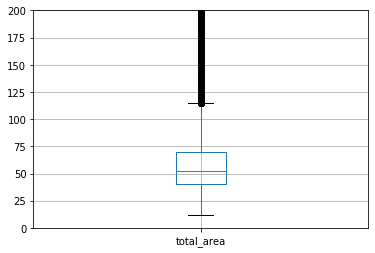

In [249]:
#нарисуем график с усами для общей площади
plt.ylim(0, 200)
realty.boxplot('total_area')
plt.show()

Первый квартиль находится на уровне 40 кв.м.
Третий квартиль на уровне 70 кв.м.
Нижний ус -> 12 (минимальное значение).
Верхний ус -> 115.
Таким образом, получаем диапазон от 12 до 115 кв.м.
Все остальное, что лежит за границей диапазона нормального размаха, считаем выбросом.

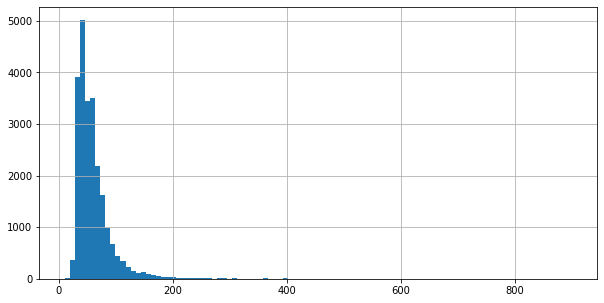

In [193]:
#Нарисуем гистограмму для общей площади
realty['total_area'].hist(bins=100, range=(10, 900), figsize=(10,5))
plt.show()

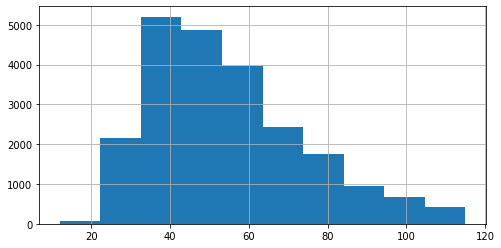

In [194]:
#Нарисуем гистограмму для общей площади без выбросов
realty.query('total_area >= 12 and total_area <= 115')['total_area'].hist(figsize=(8,4))
plt.show()

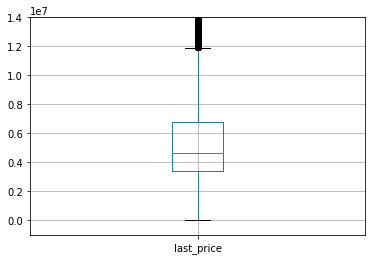

In [195]:
#нарисуем график с усами для цены
plt.ylim(-1000000, 14000000)
realty.boxplot('last_price')
plt.show()

Первый квартиль находится на уровне 3 400 000 руб.
Третий квартиль на уровне 6 800 000 руб.
Нижний ус -> 12 900 руб.
Верхний ус -> 12 000 000 руб.
Таким образом, получаем диапазон от 3 400 000 до 6 800 000 руб.
Все остальное, что лежит за границей диапазона нормального размаха, считаем выбросом.

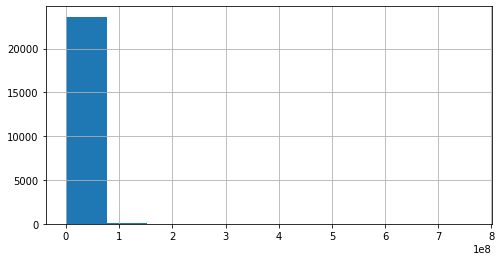

In [196]:
#Нарисуем гистограмму для цены
realty['last_price'].hist(figsize=(8,4))
plt.show()

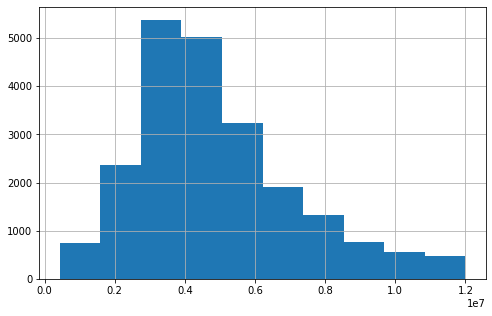

In [197]:
#Нарисуем гистограмму для цены без выбросов
realty.query('last_price >= 12900 and last_price <= 12000000')['last_price'].hist(figsize=(8,5))
plt.show()

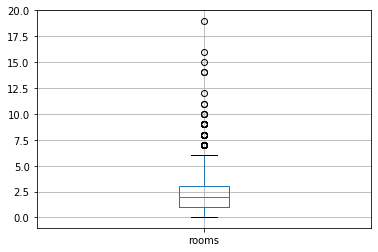

In [198]:
#нарисуем график с усами для число комнат
plt.ylim(-1, 20)
realty.boxplot('rooms')
plt.show()

Первый квартиль находится на уровне 1 комнаты.
Третий квартиль на уровне 3 комнаты
Нижний ус -> 0 комнат (ошибка в данных, берем 1)
Верхний ус -> 6 комнат
Таким образом, получаем диапазон от 1 до 6 комнат
Все остальное, что лежит за границей диапазона нормального размаха, считаем выбросом.

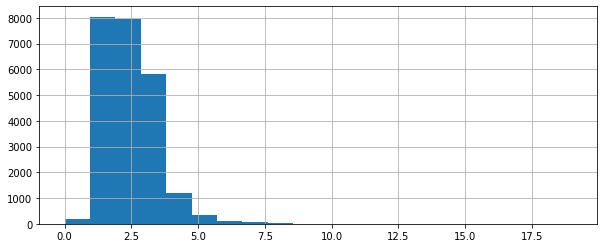

In [199]:
#Нарисуем гистограмму для число комнат
realty['rooms'].hist(bins=20, figsize=(10,4))
plt.show()

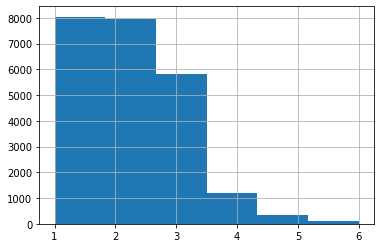

In [200]:
#Нарисуем гистограмму для число комнат без выбросов
realty.query('rooms >= 1 and rooms <= 6')['rooms'].hist(bins=6)
plt.show()

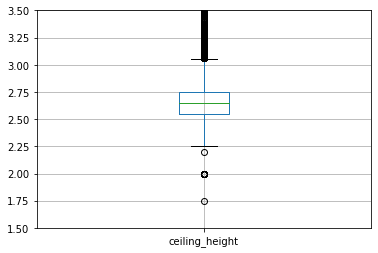

In [201]:
#нарисуем график с усами для высота потолков
plt.ylim(1.5, 3.5)
realty.boxplot('ceiling_height')
plt.show()

Первый квартиль находится на уровне 2.55м
Третий квартиль на уровне 2.7м
Нижний ус -> 2.34 м
Верхний ус -> 2.93 м
Таким образом, получаем диапазон от 2.34 до 2.93 м
Все остальное, что лежит за границей диапазона нормального размаха, считаем выбросом.

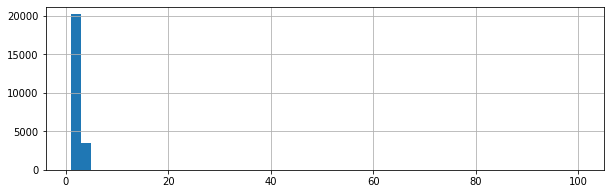

In [202]:
#Нарисуем гистограмму для высота потолков
realty['ceiling_height'].hist(bins=50, figsize=(10,3))
plt.show()

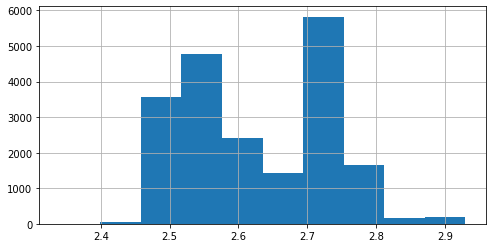

In [203]:
#Нарисуем гистограмму для высота потолков без выбросов
realty.query('ceiling_height >= 2.34 and ceiling_height <= 2.93')['ceiling_height'].hist(bins=10, figsize=(8,4))
plt.show()

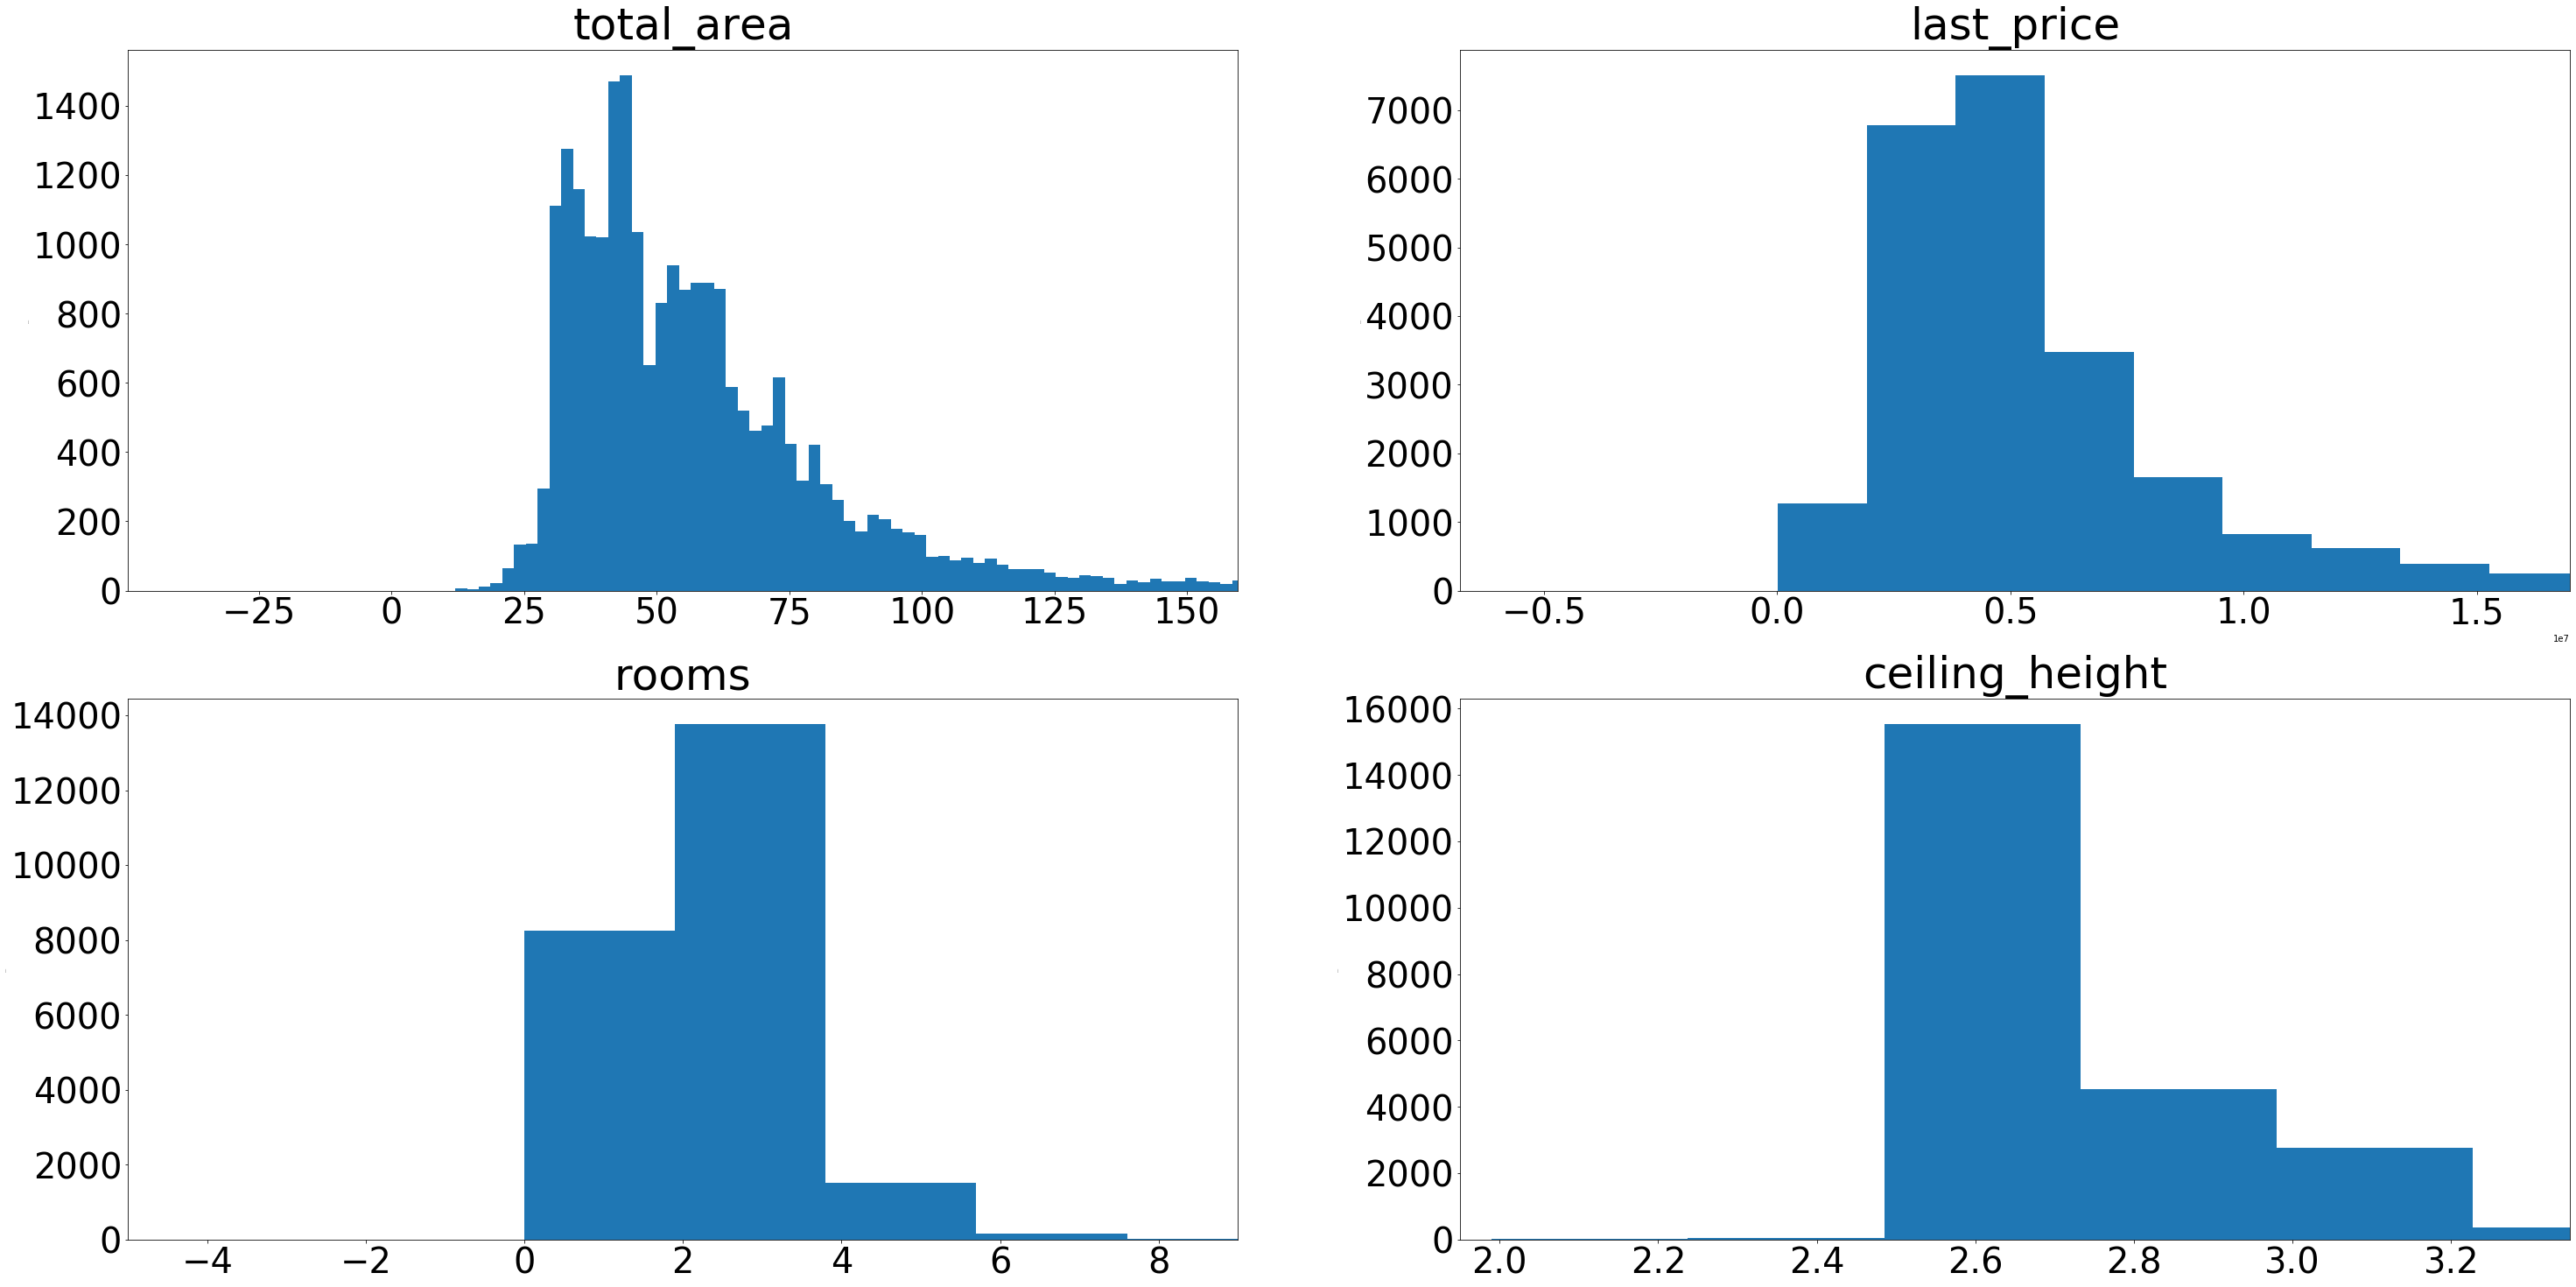

In [252]:
rows = 2
cols = 2
fig, axes = plt.subplots(rows, cols, figsize=(50,25))
column_list = ['total_area', 'last_price', 'rooms', 'ceiling_height']

count = 0
for r in range(rows):
    for c in range(cols):
        if count == 2:
            bins_c = 10
        else:
            bins_c = 400
        ax = realty[column_list[count]].plot(kind='hist', bins=bins_c, ax=axes[r,c], fontsize=40, title=column_list[count])
        Q1 = np.quantile(realty[column_list[count]], 0.25, interpolation='midpoint')
        Q3 = np.quantile(realty[column_list[count]], 0.75, interpolation='midpoint')
        ax.set_xlim([Q1-3*(Q3-Q1), Q3+3*(Q3-Q1)])
        ax.title.set_size(50)
        ax.yaxis.label.set_size(0)
        count += 1

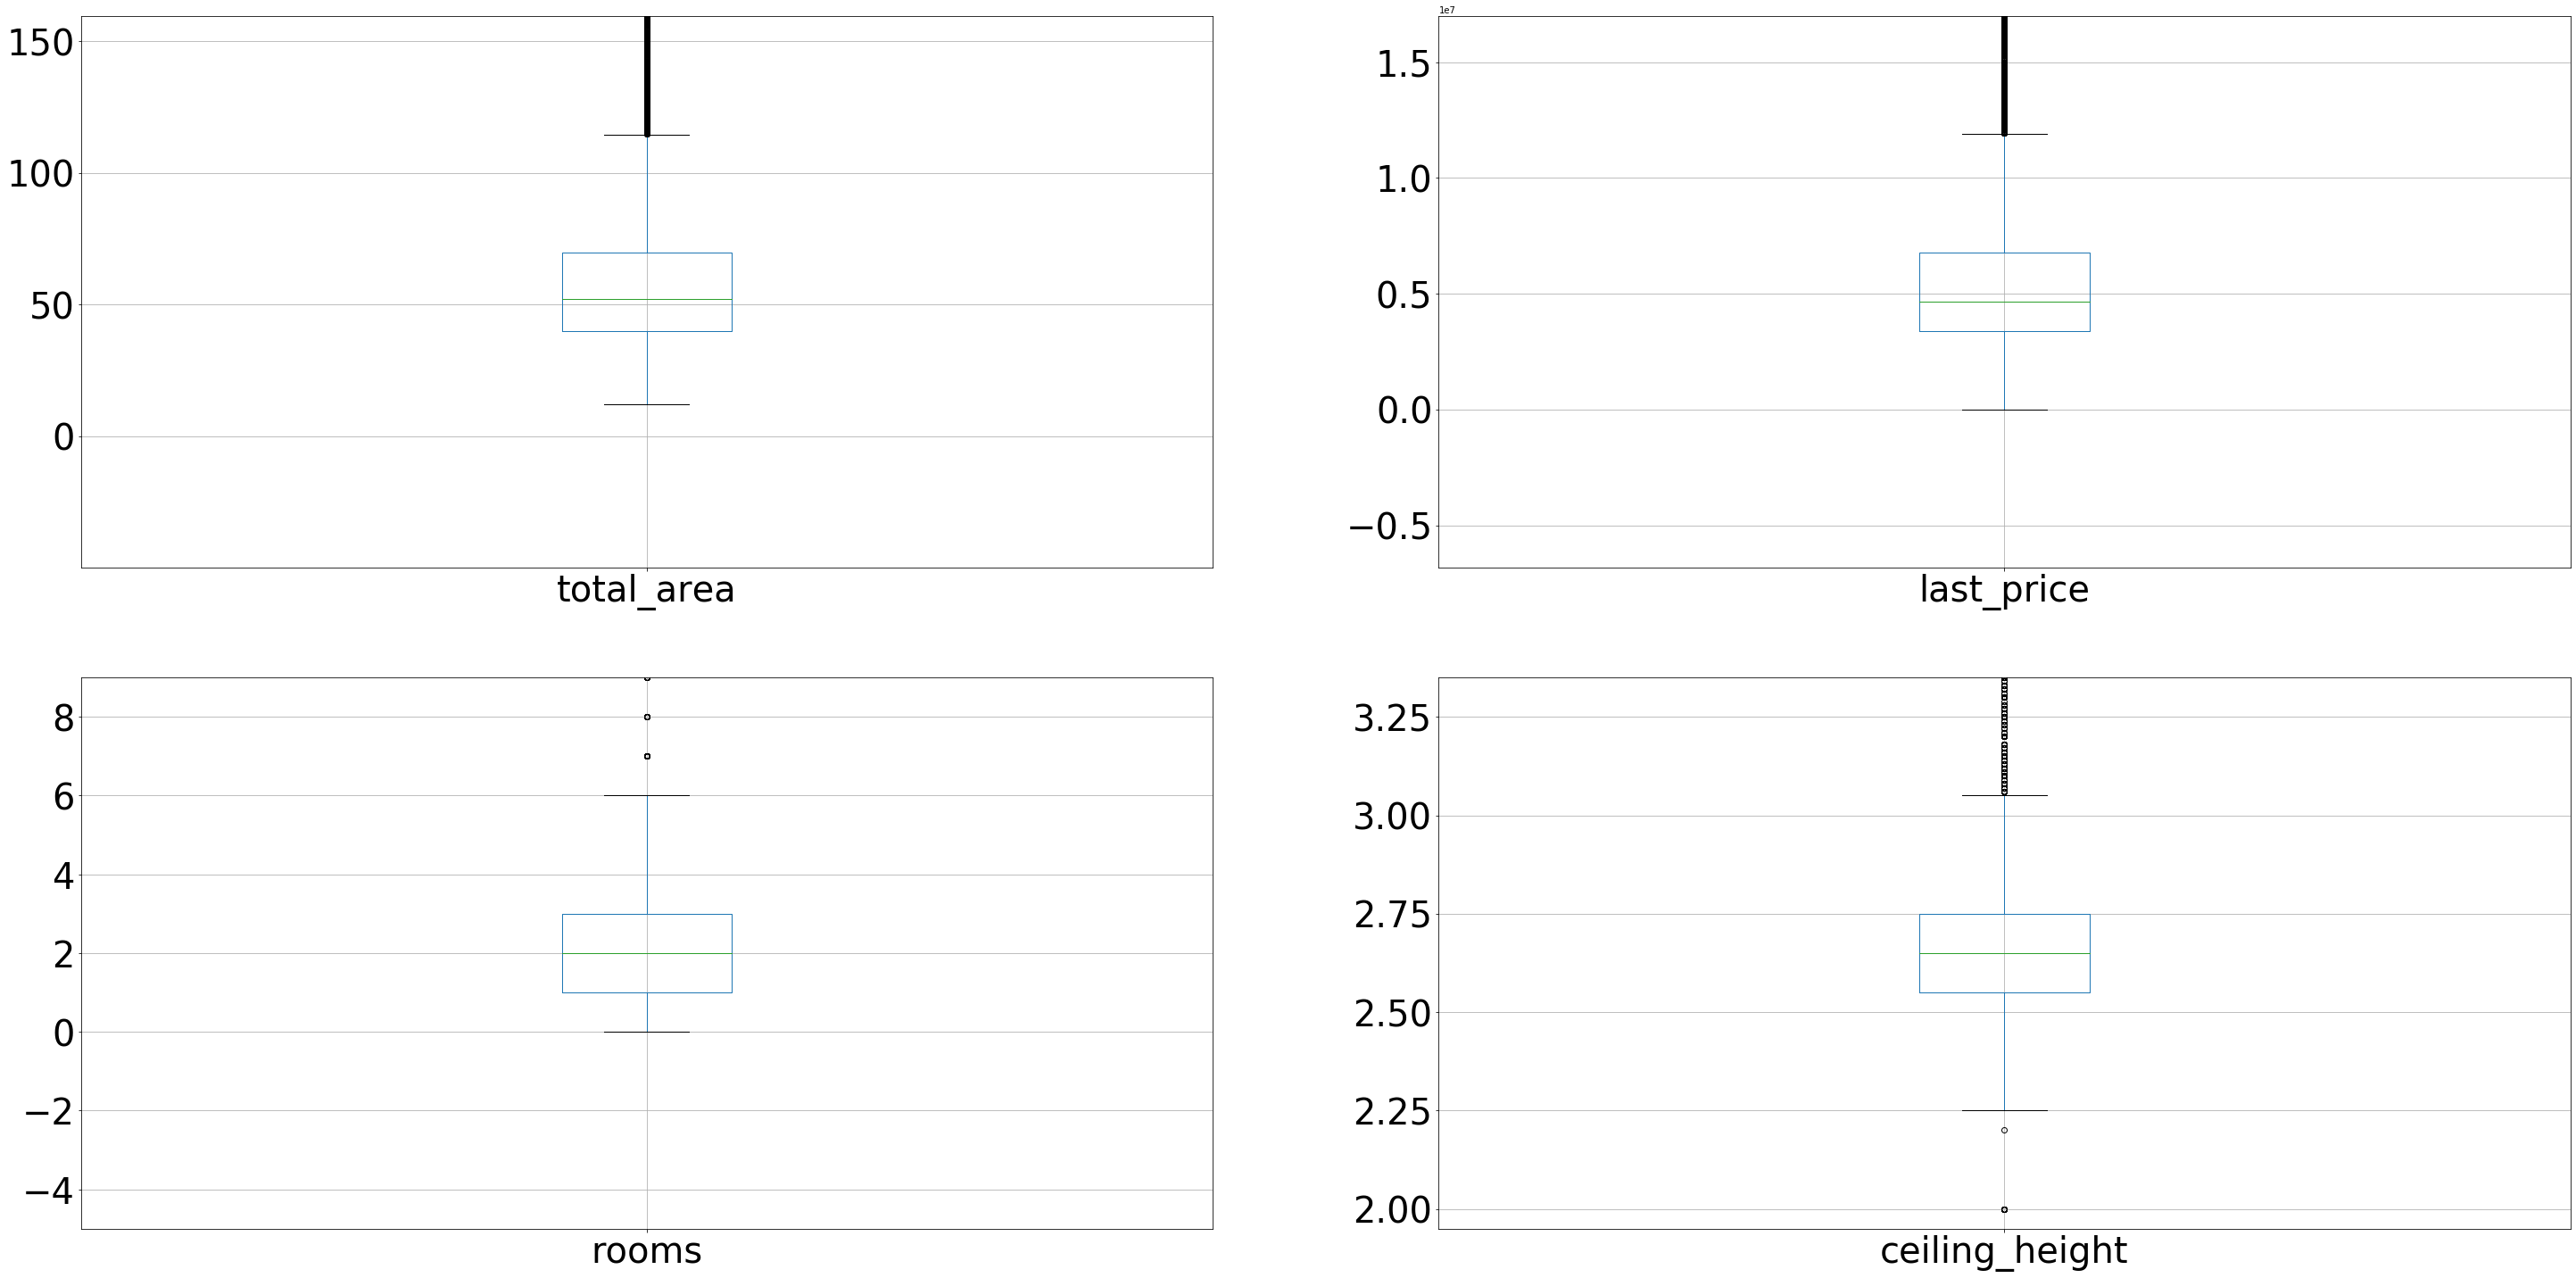

In [205]:
rows = 2
cols = 2
fig, axes = plt.subplots(rows, cols, figsize=(50,25))
column_list = ['total_area', 'last_price', 'rooms', 'ceiling_height']

count = 0
for r in range(rows):
    for c in range(cols):
        ax = realty.boxplot(column=column_list[count], ax=axes[r,c], fontsize=40)
        Q1 = np.quantile(realty[column_list[count]], 0.25, interpolation='midpoint')
        Q3 = np.quantile(realty[column_list[count]], 0.75, interpolation='midpoint')
        ax.set_ylim([Q1-3*(Q3-Q1), Q3+3*(Q3-Q1)])
        count += 1

In [206]:
#Изучим время продажи квартиры
realty.query('days_exposition>0')['days_exposition'].describe().to_frame()

,days_exposition
count,20518.000000
mean,180.888634
std,219.727988
min,1.000000
25%,45.000000
50%,95.000000
75%,232.000000
max,1580.000000


In [207]:
#найдем медиану время продажи квартиры
realty.query('days_exposition>0')['days_exposition'].median()

95.0

Среднее время продажи - почти полгода (180 дней). 
Медианное время продажи - приблизительно 3 месяца (95 дней).
Есть квартиры, которые продавались более 3,4 года (1580 дней).

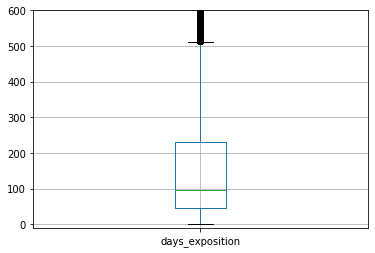

In [208]:
#нарисуем график с усами для время продажи квартиры
plt.ylim(-10, 600)
realty.boxplot(column='days_exposition')
plt.show()

Первый квартиль находится на уровне 45 дней
Третий квартиль на уровне 200 дней
Нижний ус -> 0 (необычно мало для продажи квартиры, когда размещается объявление и в тот же день снимается потом)
Верхний ус -> 512
Таким образом, получаем диапазон от 1 до 512 дней
Все остальное, что лежит за границей диапазона нормального размаха, считаем выбросом.

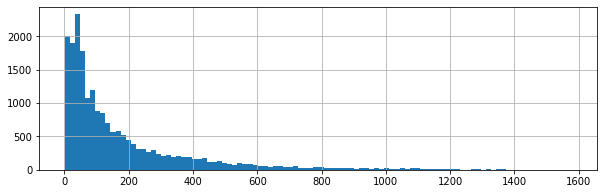

In [209]:
#Нарисуем гистограмму для время продажи квартиры
realty['days_exposition'].hist(bins=100, figsize=(10,3))
plt.show()

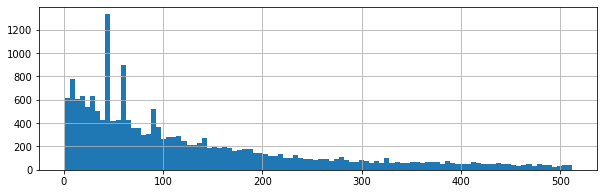

In [210]:
#Нарисуем гистограмму для время продажи квартиры без выбросов
realty.query('days_exposition > 0 and days_exposition <= 512')['days_exposition'].hist(bins=100, figsize=(10,3))
plt.show()

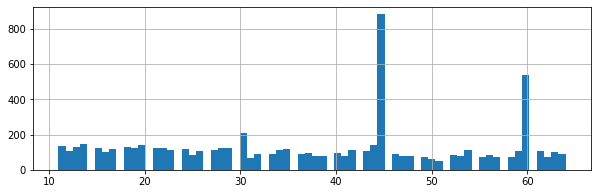

In [211]:
#рассмотрим отдельно интервал, где есть выраженные пики
realty.query('10<days_exposition<65')['days_exposition'].hist(bins=70, figsize=(10,3))

Заметим, что после 30, 45, 60 дней после размещения большая доля объявлений снимаются с размещения. Возможно это связано с какой-нибудь автоматической проверкой сервиса на актуальность самого объявления.


Продажа обычно занимает около 100 дней;
Большинство квартир продается в пределах 60 дней, а если квартира продана за 50 дней – это очень быстрая продажа.
Если квартира продается более 200 дней, то это очень долгая продажа.

In [212]:
#Изучим факторы, которые больше всего влияют на стоимость квартиры
#Будем использовать данные для сразов без выбросов, по условиям, полученным на предыдущих этапах.

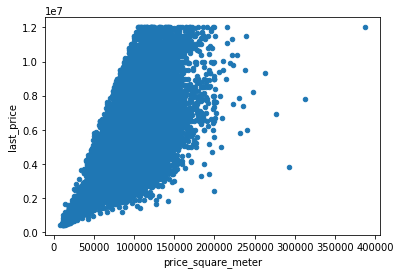

In [213]:
#Посмотрим зависимость стоимости квартиры от цены квадратного метра.
total_area_query = 'total_area >= 12 and total_area <= 115'
last_price_query = 'last_price >= 12900 and last_price <= 12000000'
clean_data_query = f'{total_area_query} and {last_price_query}'
clean_data = realty.query(f'({total_area_query}) and {last_price_query}')

clean_data.plot(x='price_square_meter', y='last_price', kind='scatter')
plt.show()

In [214]:
#коэффициента корреляции для цены за квадратный метр и стоимости квартиры
clean_data['price_square_meter'].corr(clean_data['last_price'])

0.6312384710845483

Исходя из графика и коэффициента корреляции видно, что зависимость между изменением цены за квадратный метр и ростом стоимости квартиры достаточно большая.

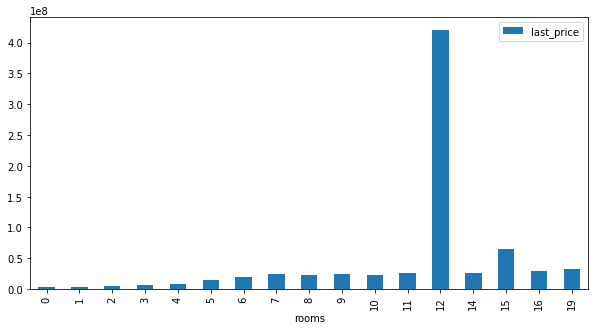

In [215]:
#Посмотрим зависимость стоимости квартиры от количества комнат
realty.groupby(['rooms']).median()['last_price'].reset_index().sort_values(by=['rooms']).plot(x='rooms', y='last_price', kind='bar', figsize=(10,5))

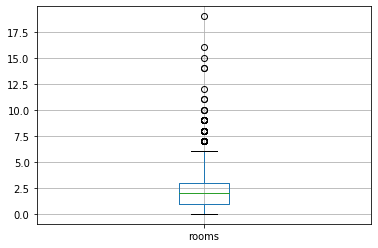

In [216]:
#Еще раз посмотрим на выбросы
realty.boxplot(column='rooms')

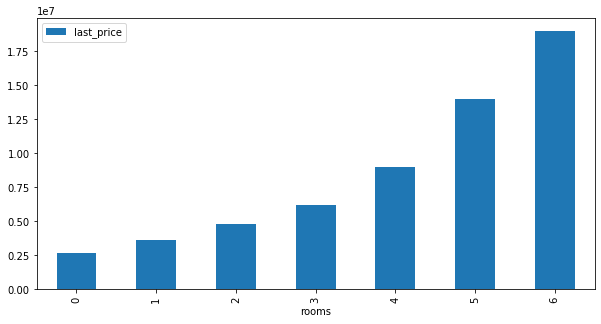

In [217]:
#Посмотрим зависимость стоимости квартиры от количества комнат уже без выбросов
realty.query('rooms <= 6').groupby(['rooms']).median()['last_price'].reset_index().sort_values(by=['rooms']).plot(x='rooms', y='last_price', kind='bar', figsize=(10,5))

Чем больше комнат, тем дороже квартира.

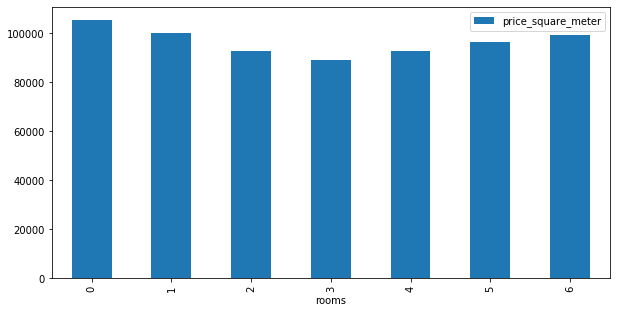

In [218]:
#Посмотрим еще зависимость цены за квадратный метр от количества комнат сразу без выбросов
realty.query('rooms <= 6').groupby(['rooms']).median()['price_square_meter'].reset_index().sort_values(by=['rooms']).plot(x='rooms', y='price_square_meter', kind='bar', figsize=(10,5))

самая дешевая цена за квадратный метр в квартирах с кол-вом комнат = 3, самая дорогая цена за квадратный метр в квартирах с наименьшим кол-вом комнат, а также в квартирах с большим кол-вом комнат

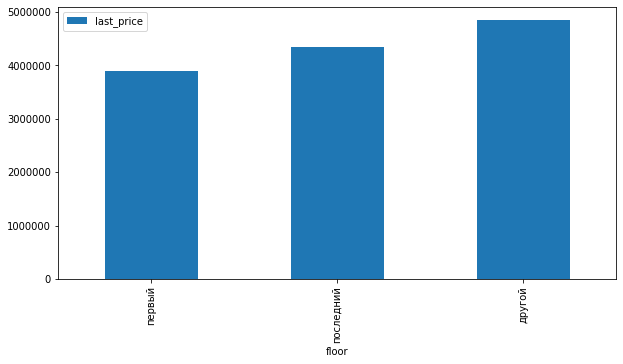

In [219]:
#Посмотрим зависимость стоимости квартиры от этажа
realty.groupby(['floor']).median()['last_price'].reset_index().sort_values(by=['last_price']).plot(x='floor', y='last_price', kind='bar', figsize=(10,5))

Квартиры на первом этаже самые дешевые.
Квартиры на последнем этаже дороже, чем на первом этаже, но дешевле чем квартиры на других этажах.

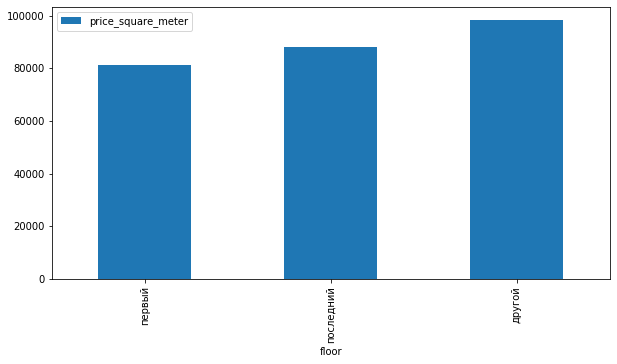

In [220]:
#Посмотрим зависимость стоимости квартиры от этажа
realty.groupby(['floor']).median()['price_square_meter'].reset_index().sort_values(by=['price_square_meter']).plot(x='floor', y='price_square_meter', kind='bar', figsize=(10,5))

как и в случае со стоимостью квратиры, цена за квадратный метр в квартирах на первом этаже самая дешевая.
Квартиры на последнем этаже дороже, чем на первом этаже, но дешевле чем квартиры на других этажах.

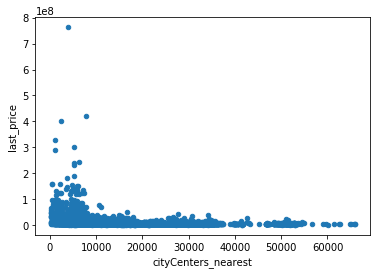

In [221]:
#Посомтрим зависимость стоимости квартиры от расстояния до центра города
realty.plot(x='cityCenters_nearest', y='last_price', kind='scatter')
plt.show()

In [222]:
clean_data = realty.query(last_price_query)
clean_data['cityCenters_nearest'].corr(clean_data['last_price'])

-0.34912208189314625

Коэффициент Пирсона показывает зависиомсть между расстоянием от центра города и стоимостью квартиры: чем ближе квратира к цетру, тем она дороже.

In [223]:
clean_data = realty.query(last_price_query)
clean_data['cityCenters_nearest'].corr(clean_data['price_square_meter'])

-0.387820427998751

Как и в случае со стоимость квартиры, коэффициент Пирсона показывает зависиомсть между расстоянием от центра города и ценой за квадратный метр квартиры: чем ближе квратира к цетру, тем она дороже.

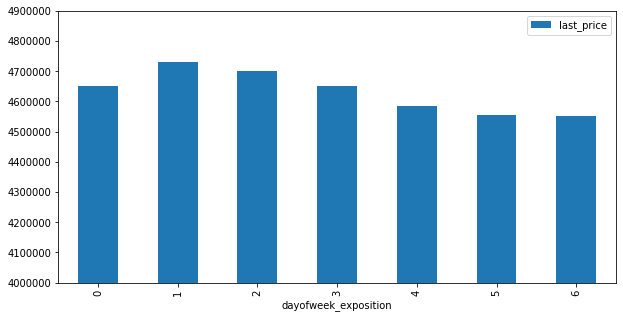

In [224]:
#Построим график зависимости средней цены от дня недели размещения объявления
realty.groupby(['dayofweek_exposition']).median()['last_price'].reset_index().sort_values(by=['dayofweek_exposition']).plot(x='dayofweek_exposition', y="last_price", kind='bar', figsize=(10,5), ylim=(4000000, 4900000))

Зависимость стоиомсти квартиры от дня недели публикации практически отсутствует.
Стоимости квартир объявлений, которые опубликованы во вторник и среду, чуть выше, чем стоимости квартиры в объявлениях, опубликованных в другие дни.

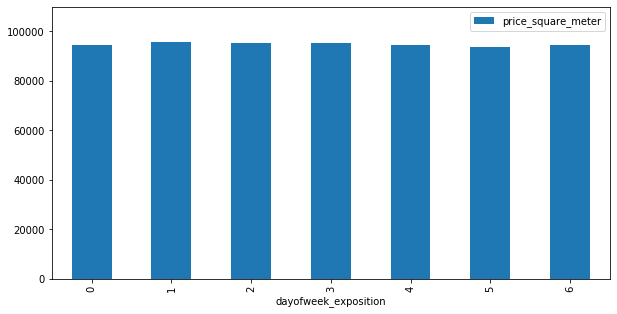

In [225]:
#Построим график зависимости средней цены за квадратный метр квартиры от дня недели размещения объявления
realty.groupby(['dayofweek_exposition']).median()['price_square_meter'].reset_index().sort_values(by=['dayofweek_exposition']).plot(x='dayofweek_exposition', y="price_square_meter", kind='bar', figsize=(10,5), ylim=(0, 110000))

Зависимость цены за квадратный метр квартиры от дня недели публикации отсутствует.

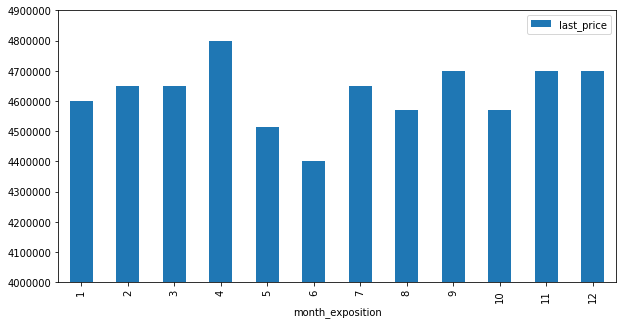

In [226]:
#Построим график зависимости средней цены от месяца публикации объявления
realty.groupby(['month_exposition']).median()['last_price'].reset_index().sort_values(by=['month_exposition']).plot(x='month_exposition', y="last_price", kind='bar', figsize=(10,5), ylim=(4000000, 4900000))

Стоимость квартир в объявлених опубликованых в апреле выше, чем в другие месяцы.
Стоимость квартир в объявлениях размещенных в июне гораздо ниже, в сравнении с другими месяцами.

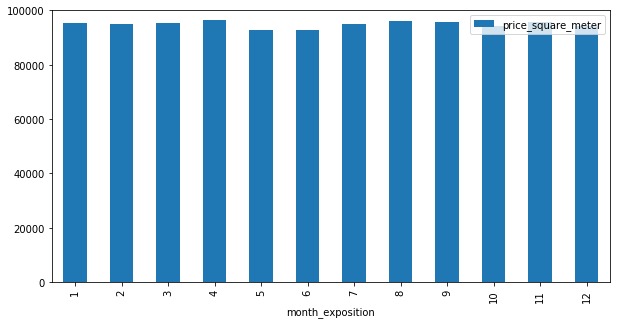

In [227]:
#Построим график зависимости средней цены за квадратный метр от месяца публикации объявления
realty.groupby(['month_exposition']).median()['price_square_meter'].reset_index().sort_values(by=['month_exposition']).plot(x='month_exposition', y="price_square_meter", kind='bar', figsize=(10,5), ylim=(0, 100000))

Зависимость цены за квадратный метр квартиры от месяца публикации отсутствует.

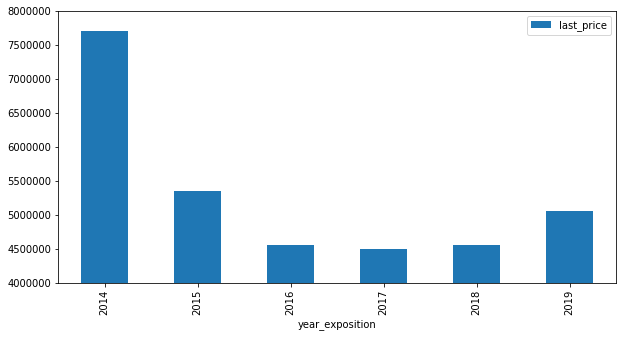

In [228]:
#Построим график зависимости средней цены от года публикации объявления
realty.groupby(['year_exposition']).median()['last_price'].reset_index().sort_values(by=['year_exposition']).plot(x='year_exposition', y="last_price", kind='bar', figsize=(10,5), ylim=(4000000, 8000000))

Стоимость квартир в объявлениях размещенных в 2014 году значительно больше, чем в остальные года, что скорее всего связано с экномическими факторами. В 2019 году стоиомости практически сравнялись с объявлениями за 2015 год.

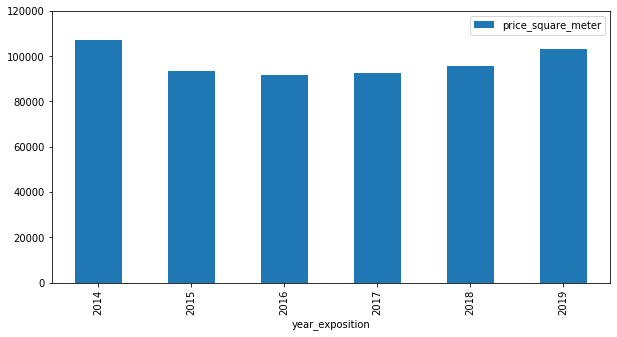

In [229]:
#Построим график зависимости средней цены за квадратный метр от года публикации объявления
realty.groupby(['year_exposition']).median()['price_square_meter'].reset_index().sort_values(by=['year_exposition']).plot(x='year_exposition', y="price_square_meter", kind='bar', figsize=(10,5), ylim=(0, 120000))

Цена за квадратный метр квартир в объявлениях размещенных в 2014 году больше, чем в остальные года, как и в случае со стоимостью квартиы. А в 2019 году цена за квадратный метр практически сравнялись с 2014 год.

In [268]:
#посмотрим на матрицу корреляций по необходимым нам параметрам
realty[['price_square_meter','last_price','cityCenters_nearest','total_area','rooms','ceiling_height','dayofweek_exposition','month_exposition','year_exposition']].corr().sort_values('price_square_meter', ascending=False)

,price_square_meter,last_price,cityCenters_nearest,total_area,rooms,ceiling_height,dayofweek_exposition,month_exposition,year_exposition
price_square_meter,1.000000,0.736499,-0.317951,0.301960,0.055420,0.106734,-0.007272,-0.001995,0.008516
last_price,0.736499,1.000000,-0.206747,0.653675,0.363343,0.069187,0.001550,0.002779,-0.043089
total_area,0.301960,0.653675,-0.231446,1.000000,0.758344,0.087076,-0.004695,0.004920,-0.079912
ceiling_height,0.106734,0.069187,-0.079643,0.087076,0.047521,1.000000,-0.008256,-0.002762,-0.001720
rooms,0.055420,0.363343,-0.184864,0.758344,1.000000,0.047521,-0.004134,-0.004469,-0.055418
year_exposition,0.008516,-0.043089,0.032333,-0.079912,-0.055418,-0.001720,-0.004799,-0.269642,1.000000
month_exposition,-0.001995,0.002779,-0.008978,0.004920,-0.004469,-0.002762,0.011496,1.000000,-0.269642
dayofweek_exposition,-0.007272,0.001550,0.008883,-0.004695,-0.004134,-0.008256,1.000000,0.011496,-0.004799
cityCenters_nearest,-0.317951,-0.206747,1.000000,-0.231446,-0.184864,-0.079643,0.008883,-0.008978,0.032333


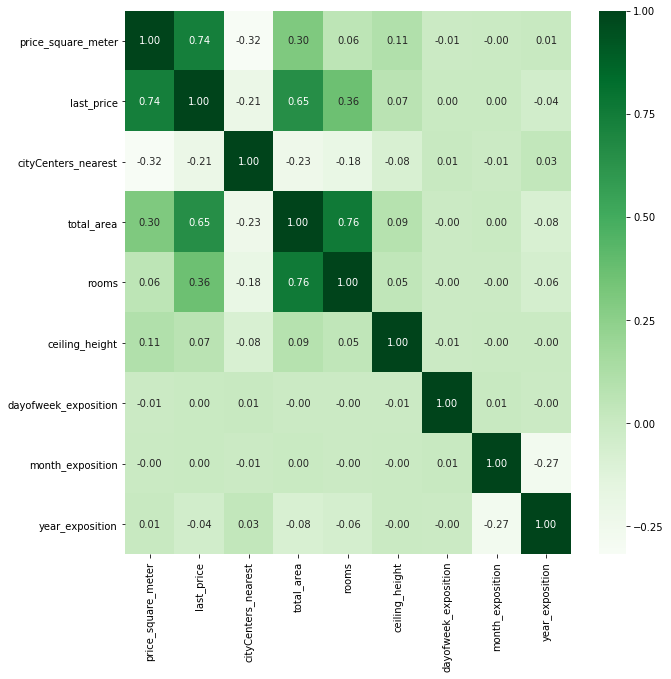

In [270]:
#для окончательных выводов посмотрим с помощью функции corr() и тепловой карты, как зависят определенные параметры квартиры на её стоимости
plt.figure(figsize=(10,10))
sns.heatmap(realty[['price_square_meter','last_price','cityCenters_nearest','total_area','rooms','ceiling_height','dayofweek_exposition','month_exposition','year_exposition']].corr(), annot=True, cmap="Greens", fmt='.2f')

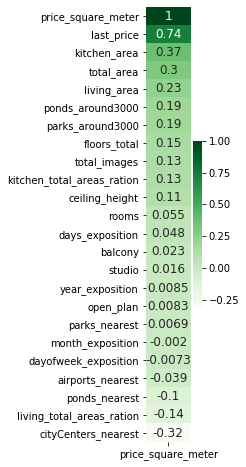

In [231]:
#посмотрим с помощью функции corr() и тепловой карты, как зависят определенные параметры квартиры на цену за квадратный метр
plt.figure(figsize=(1,8))
sns.heatmap(realty.corr()[['price_square_meter']].sort_values(by='price_square_meter', ascending=False), cmap="Greens", 
            annot=True, annot_kws={'size':12})

Кроме прямой зависиости цены за квадратный метр от стоимости квартиры и площади на нее влияеткол-во этажей, высота потолков и кол-во комнат. Свое влияние также оказывает присутствие парков/водоемов рядом.
А удаленность от центра играет наименьшую роль на цену за квадратный метр.

In [232]:
#10 населённых пунктов с наибольшим числом объявлений
top10 = realty['locality_name'].value_counts().index.tolist()[:10]
mean10_metrics = [realty[realty['locality_name'] == city]['price_square_meter'].median().round(2) for city in top10]
mean10_prices = [realty[realty['locality_name'] == city]['last_price'].median() for city in top10]
frame = {'Город': top10, 'Средняя цена за кв.м.': mean10_metrics, 'Средняя стоимость за квартиру': mean10_prices}
dataframe = pd.DataFrame(frame).sort_values(by='Средняя цена за кв.м.', ascending=False)
dataframe

,Город,Средняя цена за кв.м.,Средняя стоимость за квартиру
0,Санкт-Петербург,104761.90,5500000.0
4,Пушкин,100000.00,5180000.0
8,деревня Кудрово,91860.47,3790000.0
6,посёлок Парголово,91642.86,4100000.0
1,посёлок Мурино,85878.46,3400000.0
2,посёлок Шушары,76876.17,3950000.0
5,Колпино,74723.75,3600000.0
7,Гатчина,67796.61,3100000.0
3,Всеволожск,65789.47,3450000.0
9,Выборг,58158.32,2897000.0


Самые дорогие квартиры, в том числе и  цена за кв.м., в Санкт-Петербурге и Пушкине.
Чем дальше от Санкт-Петербурге, тем дешевле квартиры. 
В Выборге стоимость квартиры и средняя цена за кв.ме. почти в 2 раз ниже, чем в Санкт-Петербурге.

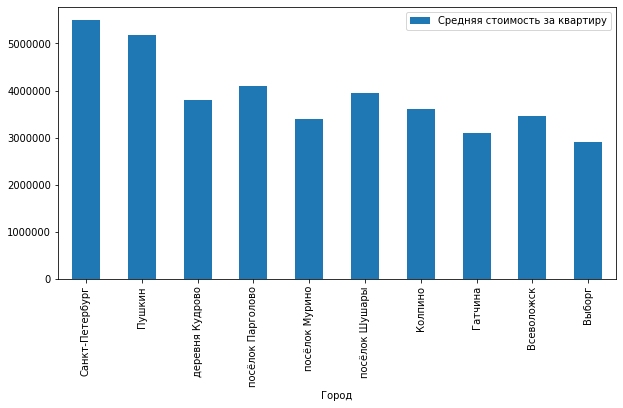

In [233]:
#график зависитмости средней стоимости за квартиру от города
dataframe.reset_index().plot(x='Город', y='Средняя стоимость за квартиру', kind='bar', figsize=(10,5))

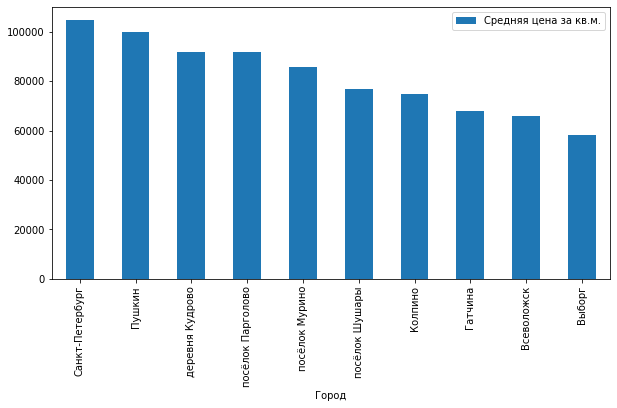

In [234]:
#график зависитмости средней цены за кв.м. за квартиру от города
dataframe.reset_index().plot(x='Город', y='Средняя цена за кв.м.', kind='bar', figsize=(10,5))

In [255]:
#Выберем все квартиры из Санкт-Петербурга
#Создадим столбец с расстоянием до центра в километрах округляя до целых значений
aparts_spb = realty.query('locality_name == "Санкт-Петербург"')
aparts_spb.loc[:, 'cityCenters_nearest_kms'] = (aparts_spb.loc[:, 'cityCenters_nearest']/1000).round()


In [256]:
#посмотрим результат
aparts_spb.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,dayofweek_exposition,month_exposition,year_exposition,living_total_areas_ration,kitchen_total_areas_ration,cityCenters_nearest_kms
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.000000,другой,NaN,...,2.0,755.0,NaN,120370.370370,3,3,2019,0.472222,0.231481,16.0
2,10,5196000.0,56.0,2015-08-20,2,2.55,5,34.300000,другой,NaN,...,2.0,574.0,558.0,92785.714286,3,8,2015,0.612500,0.148214,14.0
3,0,64900000.0,159.0,2015-07-24,3,2.60,14,97.320303,другой,NaN,...,3.0,234.0,424.0,408176.100629,4,7,2015,0.612077,0.145541,7.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.000000,другой,NaN,...,1.0,48.0,121.0,100000.000000,1,6,2018,0.320000,0.410000,8.0
7,5,7915000.0,71.6,2019-04-18,2,2.75,24,40.756587,другой,NaN,...,0.0,NaN,NaN,110544.692737,3,4,2019,0.569226,0.263966,12.0
9,18,5400000.0,61.0,2017-02-26,3,2.50,9,43.600000,другой,NaN,...,0.0,NaN,289.0,88524.590164,6,2,2017,0.714754,0.106557,15.0
10,5,5050000.0,39.6,2017-11-16,1,2.67,12,20.300000,другой,NaN,...,2.0,553.0,137.0,127525.252525,3,11,2017,0.512626,0.214646,14.0
15,16,4650000.0,39.0,2017-11-18,1,2.60,14,20.500000,другой,NaN,...,1.0,296.0,19.0,119230.769231,5,11,2017,0.525641,0.194872,14.0
16,11,6700000.0,82.0,2017-11-23,3,3.05,5,55.600000,первый,NaN,...,0.0,NaN,397.0,81707.317073,3,11,2017,0.678049,0.109756,11.0
17,6,4180000.0,36.0,2016-09-09,1,2.70,17,16.500000,другой,NaN,...,1.0,859.0,571.0,116111.111111,4,9,2016,0.458333,0.305556,15.0


In [236]:
#посмотрим кол-во квартир
len(aparts_spb)

15721

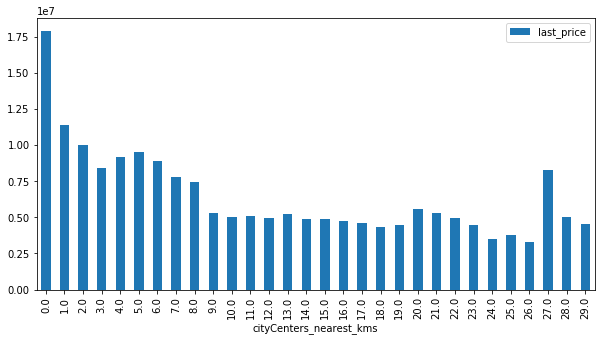

In [237]:
#Строим график медианной цены в зависимости от удаленности от города
aparts_spb.groupby(['cityCenters_nearest_kms']).median()['last_price'].reset_index().sort_values(by=['cityCenters_nearest_kms']).plot(x='cityCenters_nearest_kms', y='last_price', kind='bar', figsize=(10,5))

В радиусе до 1 км. медианная цена на квартиру стремится к 20 000 000 руб. 
Определим границу центра радиусом в 8 км, так как в этом значении медианная цена на графике значительно меньше.

In [238]:
aparts_in_center = aparts_spb.query('cityCenters_nearest <= 8000')
#посмотрим кол-во квартир
len(aparts_in_center)

3712

In [239]:
#посмотрим и изучим наш срез данных по квартирам в центре
aparts_in_center[['total_area', 'last_price', 'rooms', 'ceiling_height']].describe()

,total_area,last_price,rooms,ceiling_height
count,3712.000000,3.712000e+03,3712.000000,3712.000000
mean,92.328303,1.472962e+07,2.813308,2.978982
std,60.531664,2.470451e+07,1.456235,0.717128
min,12.000000,1.600000e+06,0.000000,2.000000
25%,56.000000,6.590000e+06,2.000000,2.700000
50%,77.760000,9.000000e+06,3.000000,3.000000
75%,108.725000,1.413138e+07,3.000000,3.102500
max,900.000000,7.630000e+08,19.000000,32.000000


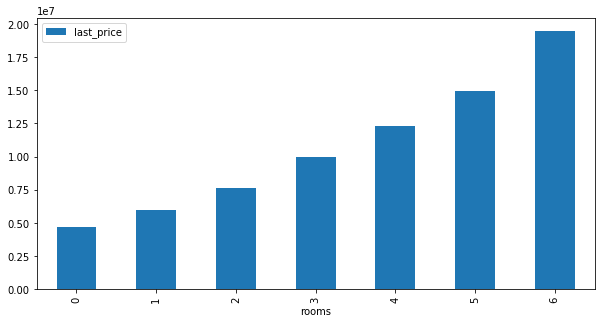

In [240]:
#Посмотрим зависимость стоимости квартиры в центре от количества комнат
#Будем использовать ограничение 6 комнат как и ранее
aparts_in_center.query('rooms <= 6').groupby(['rooms']).median()['last_price'].reset_index().sort_values(by=['rooms']).plot(x='rooms', y='last_price', kind='bar', figsize=(10,5))

Чем больше кол-во комнат, тем больше стоимость квартиры.

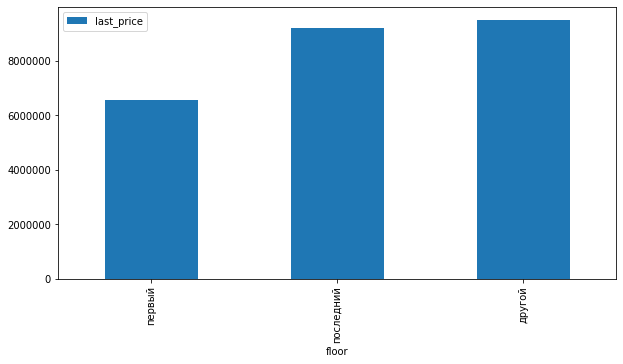

In [241]:
#Посмотрим зависимость стоимости квартиру в центре от этажа
aparts_in_center.groupby(['floor']).median()['last_price'].reset_index().sort_values(by=['last_price']).plot(x='floor', y='last_price', kind='bar', figsize=(10,5))

Первый этаж самый дешевый, практически на 25% от других вариантов.

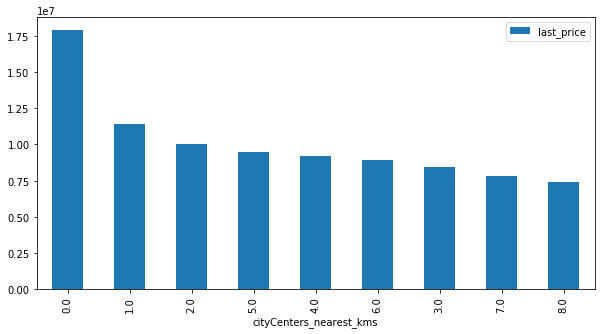

In [242]:
#Посмотрим зависимость стоимости квартиры в центре от удаленности от центра
aparts_in_center.groupby(['cityCenters_nearest_kms']).median()['last_price'].reset_index().sort_values(by=['last_price'], ascending=False).plot(x='cityCenters_nearest_kms', y='last_price', kind='bar', figsize=(10,5))

Чем дальше квартира находится от самого Центра, тем она дешевле.

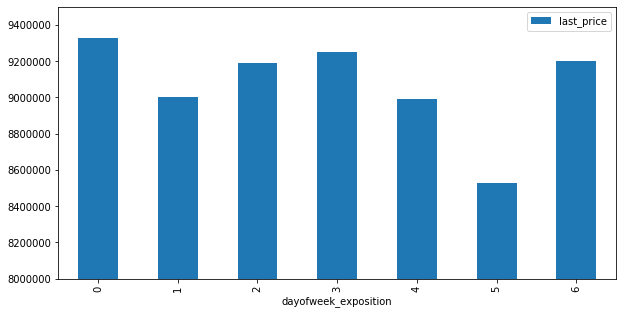

In [243]:
#Посмотрим зависимость стоимости квартиры в центре от дня недели публикации объявления
aparts_in_center.groupby(['dayofweek_exposition']).median()['last_price'].reset_index().sort_values(by=['dayofweek_exposition']).plot(x='dayofweek_exposition', y="last_price", kind='bar', figsize=(10,5), ylim=(8000000, 9500000))

Зависимость стоиомсти квартиры от дня недели публикации незначительная.
Стоимости квартир объявлений, которые опубликованы в субботу, чуть ниже, чем стоимости квартиры в объявлениях, опубликованных в другие дни.
Четкой зависимости от дня публикации объявления нету, как и в случае по всем данным. Однако можно сказать, что в обоих случаях лучше всего публиковать объявление в среду, а хуже всего в субботу.

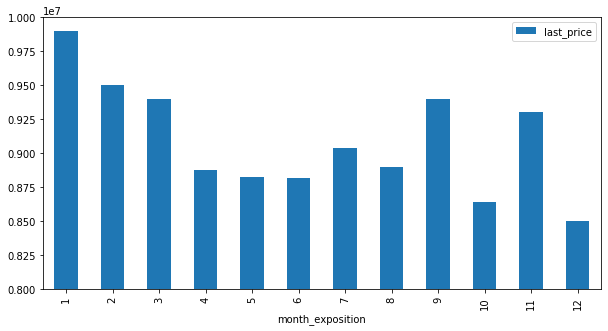

In [244]:
#Посмотрим зависимость стоимости квартиры в центре от месяца размещения объявления
aparts_in_center.groupby(['month_exposition']).median()['last_price'].reset_index().sort_values(by=['month_exposition']).plot(x='month_exposition', y="last_price", kind='bar', figsize=(10,5), ylim=(8000000, 10000000))

Стоимость квартир в объявлених опубликованых в январе выше, чем в другие месяцы.
Стоимость квартир в объявлениях размещенных в декабре и октябре гораздо ниже, в сравнении с другими месяцами.
В обоих случаях, неблагоприятные месяцы для размещения объявление в мае и июне, а сентябрь и ноябрь в первом и во втором случае - неплохие месяцы для размещения квартиры. Скорее всего падение связано с уменьшением спроса на покупку на лето, тогда и снижаются цены, а потом возврату покупательской активности уже осенью.

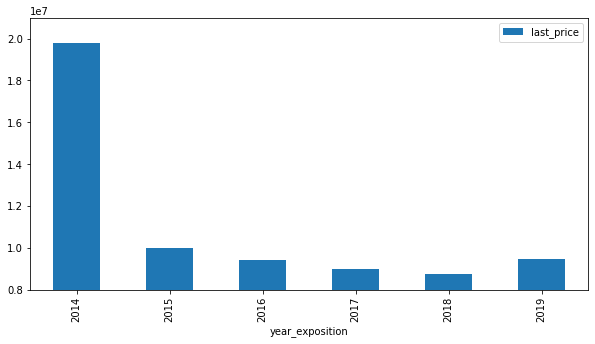

In [245]:
#Посмотрим зависимость стоимости квартиры в центре от года размещения объявления
aparts_in_center.groupby(['year_exposition']).median()['last_price'].reset_index().sort_values(by=['year_exposition']).plot(x='year_exposition', y="last_price", kind='bar', figsize=(10,5), ylim=(8000000, 21000000))

Стоимость квартир в объявлениях размещенных в 2014 году значительно больше, чем в остальные года, что совпадает с показателями по общим данным.

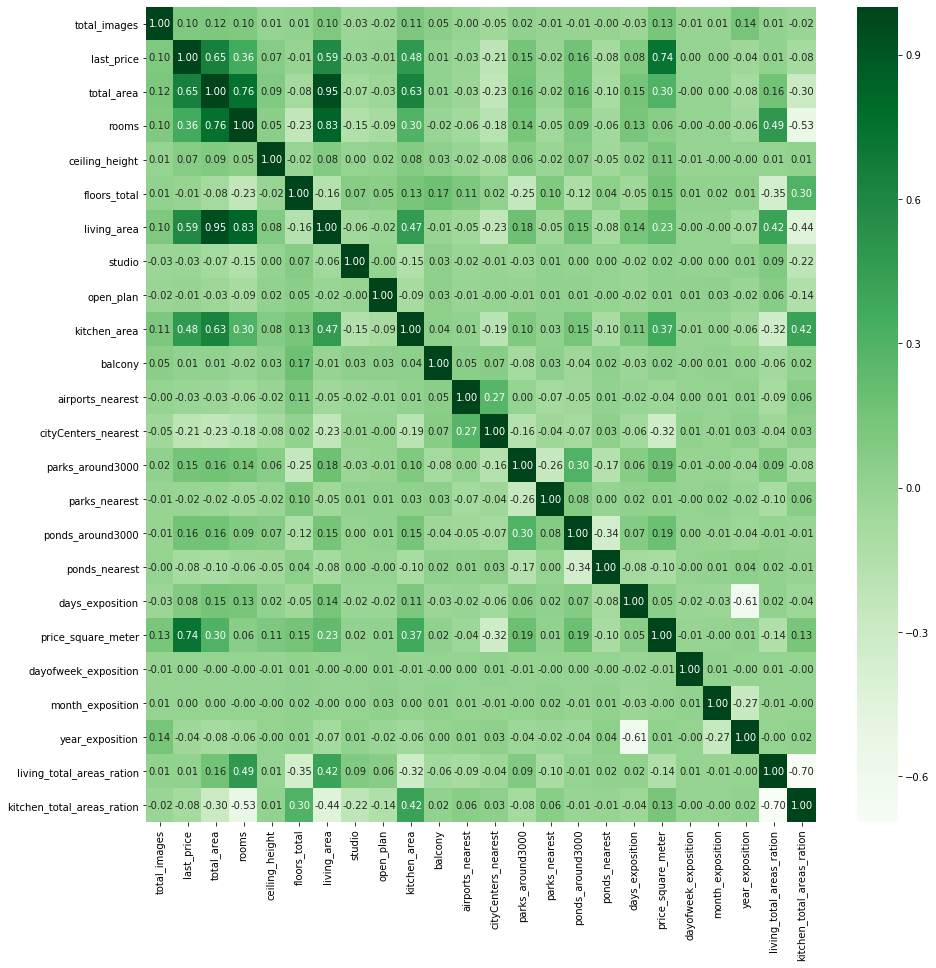

In [246]:
#для окончательных выводов посмотрим с помощью функции corr() и тепловой карты, как зависят определенные параметры квартиры на её стоимости
plt.figure(figsize=(15,15))
sns.heatmap(realty.corr(), annot=True, cmap="Greens", fmt='.2f')

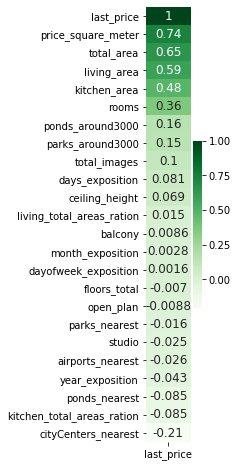

In [247]:
#А если выделить только столбец last_price для подробного анализа зависимости различных параметров именно на стоимость
plt.figure(figsize=(1,8))
sns.heatmap(realty.corr()[['last_price']].sort_values(by='last_price', ascending=False), cmap="Greens", 
            annot=True, annot_kws={'size':12})

Наибольшая зависимость стоимости на квартиру от цены за квадратный метр, от общей площади квартиры, от площади жилой площади и площади кухни, а также от количества комнат, т.е. чем больше параметр, тем дороже. Незначительное влияние оказывает присутствие парков/водоемов рядом и др.параметров инфрастуктуры.
Удаленность от центра, тоже играет роль, чем дальше от центра, тем дешевле квартира.

<b>изучим зависимости цены кв. метра от параметров квартиры для центра и для остальной части города</b>

In [364]:
#напишем функцию для построения графиков зависимости одной величины от другой:
def plot_depends(column, key, query0=None):
    if column == 'floor':
        sort_key = key
    else:
        sort_key = column
  
    plt.figure(figsize=(12,5)) 
    ax = plt.gca()
    
    if query0 is None:
        plot = realty.groupby(column).median()[key].reset_index().sort_values(by=sort_key).plot(x=column, y=key, kind='bar', title='зависимость '+column+' от '+key, color='blue', legend=None, ax=ax, width=0.4, position=1)
        plot = aparts_in_center.groupby(column).median()[key].reset_index().sort_values(by=sort_key).plot(x=column, y=key, kind='bar', title='зависимость '+column+' от '+key, color='red', legend=None, ax=ax, width=0.4, position=2)
    else:
        plot = realty.query(query0).groupby(column).median()[key].reset_index().sort_values(by=sort_key).plot(x=column, y=key, kind='bar', title='зависимость '+column+' от '+key, color='blue', legend=None, ax=ax, width=0.4, position=1)
        plot = aparts_in_center.query(query0).groupby(column).median()[key].reset_index().sort_values(by=sort_key).plot(x=column, y=key, kind='bar', title='зависимость '+column+' от '+key, color='red', legend=None, ax=ax, width=0.4, position=2)
    
    
    x_axis = ax.xaxis
    x_axis.label.set_visible(False)
    ax.legend(['Санкт-Петербург','Центр'])
    plt.xticks(rotation=0)
    return plot

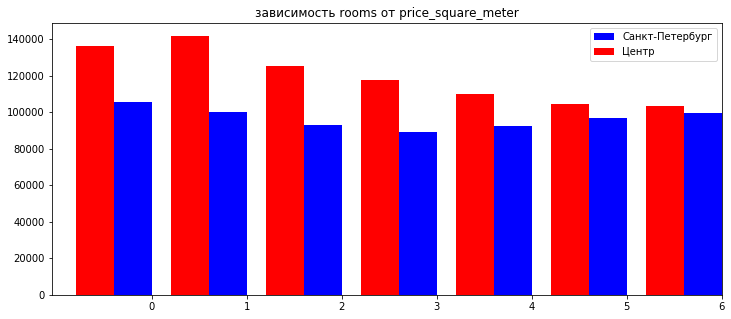

In [380]:
plot_depends('rooms','price_square_meter', 'rooms<=6')

Чем меньше комнат в квартире тем больше цена за кв.м. у неё в центре, но цены за кв.м. на 5 и 6-комнатные квартиры в центре и по всему городу почти одинаковы.

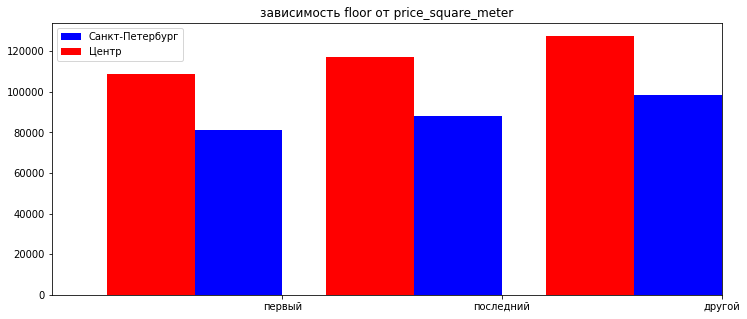

In [381]:
plot_depends('floor','price_square_meter')

Зависимость цены за кв.м., при которой квартира в центре дороже , чем по всему городу сохраняется. Квартиры на первом этаже в центре дешевле других.

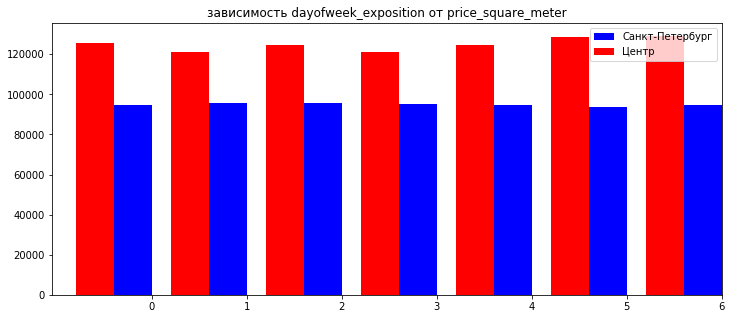

In [396]:
plot_depends('dayofweek_exposition','price_square_meter')

зависимость цены за кв.м. от дня публикации объявления практически отсутствует как для центра, так и для всего города. Цена в центре больше, как и везде дороже, чем во всем городе.

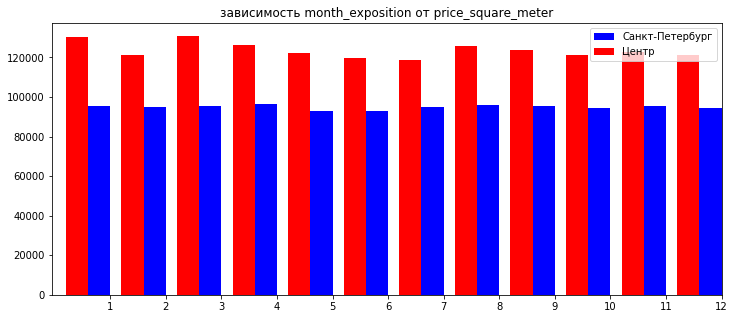

In [397]:
plot_depends('month_exposition','price_square_meter')

цена за кв.м. в центре наибольшая в январе и марте, когда при этом цена за кв.м. во всем городе не имеет ярко выраженных колебаний. Исключением является летний период, спрос летом падает, люди в это время отдыхают и поэтому снижаются цены. Это справедливо как для центра, так и для всего города.

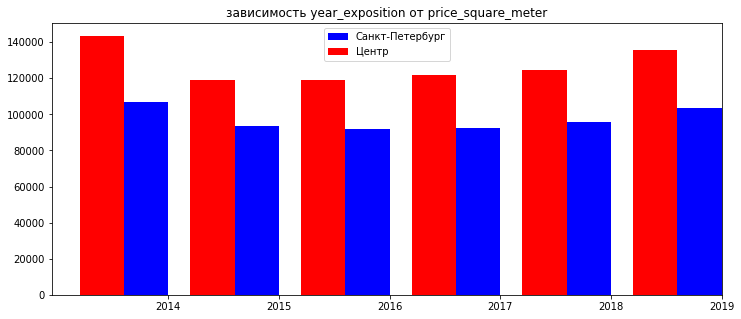

In [398]:
plot_depends('year_exposition','price_square_meter')

Цена за кв.м. в центре и во всем городе была наибольшей в 2014, потом упала и в 2019 уже почти вернулась на уровень 2014 опять.

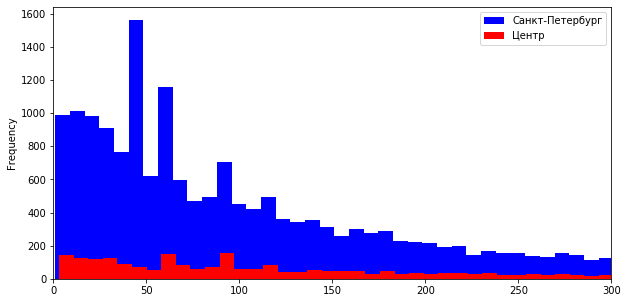

In [377]:
#время продажи в центре и по всему городу
ax = plt.gca()
realty['days_exposition'].plot(kind='hist', bins=200, figsize=(10,5), ax=ax, color='blue', xlim=(0, 300))
aparts_in_center['days_exposition'].plot(kind='hist', bins=200, figsize=(10,5), ax=ax, color='red', xlim=(0, 300))
plt.legend(['Санкт-Петербург','Центр'])

квартиры в центре продаются гораздо дольше чем по всему городу, причной этому в первую очередь является большая цена

### Шаг 5. Общий вывод

Наибольшее влияние на стоимость квартиры и на цену за кв.м. оказывают:
Площадь квартиры
Доля жилой площади/кухни
Количество комнат 
Этаж 
Удаленность от центра 
День размещения объявления 
Месяц размещения объявления 
Год размещения объявления 

При этом заметим, что:
Чем больше площадь квартиры, тем больше стоимость 
Чем больше цена за квадратный метр квартиры, тем больше стоимость 
Чем больше доля жилой площади и площади кухни квартиры, тем больше стоимость 
Чем больше комнат в квартире, тем больше стоимость 
Чем меньше комнат в квартире тем больше цена за кв.м. у неё в центре, но цены за кв.м. на 5 и 6-комнатные квартиры в центре и по всему городу почти одинаковы.
На первом этаже квартира стоит дешевле, чем на других, не зависимо от того находится она в центре или нет 
На последнем этаже квартира стоит дороже, чем на первом, но дешевле чем на других этажах, не зависимо от того находится она в центре или нет
Чем ближе к центру расположена квартира, тем она дороже. 
В центре (< 1 км) квартиры стоят гораздо дороже.
Квартиры, размещенные в среду продаются по лучшей цене, а размещенные в субботу по более низкой цене.
Квартиры, размещенные в мае и июне имеют невысокую стоимость, а размещенные в сентябре и ноябре имеют хорошую цену.
Квартиры, размещенные в 2014 году, самые дорогие. В 2019г. цены на квартиры начали снова расти и почти достигли уровня 2015 года.
Цена за кв.м. в центре и во всем городе была наибольшей в 2014, потом упала и в 2019 уже почти вернулась на уровень 2014 опять.
Квартиры в центре продаются гораздо дольше, чем по всему городу, причной этому в первую очередь является большая цена.
Цена за кв.м. в летний период снижается, т.к. падает спрос , люди в это время отдыхают и поэтому снижаются цены. Это справедливо как для центра, так и для всего города.
